<a href="https://colab.research.google.com/github/Mahimitra/DL-HW1/blob/main/Mahimitr_DL_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

from numpy import argmax
from keras.models import load_model

from sklearn.model_selection import train_test_split

In [ ]:
from keras.datasets import mnist

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
trainY.shape

(60000,)

In [ ]:
testX.shape

(10000, 28, 28)

In [ ]:
testY.shape

(10000,)

In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
trainX = trainX/ 255.0
testX = testX/ 255.0

In [ ]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.25, random_state= 8) 

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28, 28)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile modeltten
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(valX, valY))

Epoch 1/5
1407/1407 [==============================] - 52s 36ms/step - loss: 0.0450 - accuracy: 0.9331 - val_loss: 0.0224 - val_accuracy: 0.9676
Epoch 2/5
1407/1407 [==============================] - 51s 37ms/step - loss: 0.0187 - accuracy: 0.9741 - val_loss: 0.0180 - val_accuracy: 0.9736
Epoch 3/5
1407/1407 [==============================] - 49s 35ms/step - loss: 0.0129 - accuracy: 0.9831 - val_loss: 0.0164 - val_accuracy: 0.9759
Epoch 4/5
1407/1407 [==============================] - 48s 34ms/step - loss: 0.0093 - accuracy: 0.9883 - val_loss: 0.0157 - val_accuracy: 0.9775
Epoch 5/5
1407/1407 [==============================] - 48s 34ms/step - loss: 0.0071 - accuracy: 0.9918 - val_loss: 0.0154 - val_accuracy: 0.9786


In [ ]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 97.940


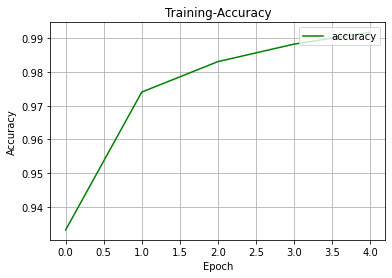

In [25]:

# summarize history for accuracy
plt.plot(history.history['accuracy'],color='green')
plt.title('Training-Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper right')
plt.grid()
plt.show()




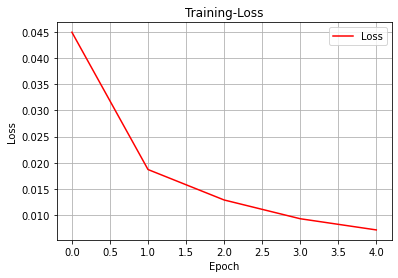

In [24]:
# summarize history for loss
plt.plot(history.history['loss'], color='red')
plt.title('Training-Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper right')
plt.grid()
plt.show()

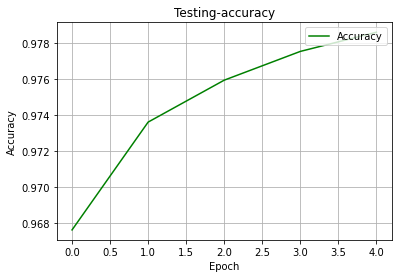

In [26]:
## 2.(ii)
# summarize history for accuracy
plt.plot(history.history['val_accuracy'],color = 'green')
plt.title('Testing-accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'], loc='upper right')
plt.grid()
plt.show()


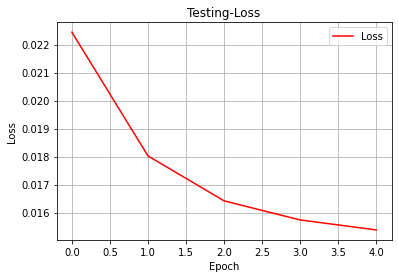

In [27]:
# summarize history for loss
plt.plot(history.history['val_loss'], color='red')
plt.title('Testing-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
#prediction
index = random.randint(0,10)
img = testX[index]
img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
img = img.astype('float32')
img = img / 255.0

predict_value = model.predict(img)
digit = argmax(predict_value)

print('The predicted outcome from the model is: ', digit)

1/1 [==============================] - 0s 40ms/step
The predicted outcome from the model is:  5


https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python
https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_feedforward_neuralnetwork/
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/